<a href="https://colab.research.google.com/github/fernandassan7/Stata-Estadistica-resumida-y-gestion-de-datos/blob/main/Misi%C3%B3n3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🧮 Cargue y lectura de la base de datos**

In [277]:
#Cargar archivo
import pandas as pd
from google.colab import files

#Leer el archivo Excel y guardar como DataFrame
df = pd.read_excel('datos_clientes.xlsx')

In [278]:
#Mostrar las primeras filas
df.head(5)

,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad
0,1000,NaN,Avenida 30 #10-20,Pereira,154,"1,922,121",28
1,1001,NaN,Calle 33 #12-50,Cali,96,"1,137,027",24
2,1002,NaN,Calle 50 #18-40,Cali,102,"2,904,933",39
3,1003,Camila Torres Ramírez,Avenida 30 #10-20,Barranquilla,144,NaN,56
4,1004,Camila Torres Sánchez,Calle 80 #30-25,Cartagena,143,NaN,36


In [279]:
#Número total de columnas
num_columnas = df.shape[1]
print(f"El DataFrame tiene {num_columnas} columnas.")

#Número total de registros
num_registros = df.shape[0]
print(f"El DataFrame tiene {num_registros} registros.")


El DataFrame tiene 7 columnas.
El DataFrame tiene 50 registros.


**🧹 Limpieza de datos**

In [280]:
#Reemplazar  los  espacio en blanco con df.nan
import pandas as pd

# Reemplazar los espacios en blanco con valores faltantes (pd.NA)
df["Nombre Completo"] = df["Nombre Completo"].replace(r'^\s*$', pd.NA, regex=True)  # Detecta espacios vacíos y los convierte en NaN
df["Sueldo Mensual"] = df["Sueldo Mensual"].replace(r'^\s*$', pd.NA, regex=True)  # Aplica lo mismo para la columna "Sueldo Mensual"
# La expresión ^\s*$ busca celdas que estén completamente vacías o que solo contengan espacios en blanco (^ inicio de l cadena, \s* cualquier cantidad de espacios en blanco y $ final de la cadena).

# Mostrar solo las filas 0, 1, 2, 3, 4 y 48 para verificar cambios
(df.loc[[0, 1, 2, 3, 4, 48]])  # Selecciona y muestra las filas con índices específicos


,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad
0,1000,NaN,Avenida 30 #10-20,Pereira,154,"1,922,121",28
1,1001,NaN,Calle 33 #12-50,Cali,96,"1,137,027",24
2,1002,NaN,Calle 50 #18-40,Cali,102,"2,904,933",39
3,1003,Camila Torres Ramírez,Avenida 30 #10-20,Barranquilla,144,NaN,56
4,1004,Camila Torres Sánchez,Calle 80 #30-25,Cartagena,143,NaN,36
48,1048,Andrés Rodríguez López,Avenida 15 #5-10,Ibagué,194,NaN,38


In [281]:
# Identificar valores faltantes
import pandas as pd

# Contar cuántos valores faltantes hay en cada columna
missing_counts = df.isna().sum()  # Cuenta los NaN en cada columna
missing_counts = missing_counts[missing_counts > 0]  # Filtra solo las columnas con valores faltantes
print("Valores faltantes por columna:")
print(missing_counts)

# Encontrar la posición exacta de los valores faltantes
missing_positions = df.isna().stack()  # Convierte el DataFrame en una Serie con múltiples índices (fila, columna)
missing_positions = missing_positions[missing_positions]  # Filtra solo las posiciones donde hay NaN
print("\nPosiciones exactas de los valores faltantes:")
print(missing_positions)


Valores faltantes por columna:
Nombre Completo    3
Sueldo Mensual     3
dtype: int64

Posiciones exactas de los valores faltantes:
0   Nombre Completo    True
1   Nombre Completo    True
2   Nombre Completo    True
3   Sueldo Mensual     True
4   Sueldo Mensual     True
48  Sueldo Mensual     True
dtype: bool


In [282]:
#Visualizar  los  datos faltantes   de  la tabla  clientes  usando la librería PANDAS
import pandas as pd  # Importamos la librería pandas para manipular los datos
from IPython.display import display  # Importamos display para mostrar la tabla en un formato más legible

# Filtrar filas donde al menos una de las columnas ("Nombre Completo" o "Sueldo Mensual") tiene un valor NaN
nan_rows = df[df["Nombre Completo"].isna() | df["Sueldo Mensual"].isna()]

# Mostrar la tabla filtrada con las filas que contienen valores NaN en cualquiera de las dos columnas
display(nan_rows)


,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad
0,1000,NaN,Avenida 30 #10-20,Pereira,154,"1,922,121",28
1,1001,NaN,Calle 33 #12-50,Cali,96,"1,137,027",24
2,1002,NaN,Calle 50 #18-40,Cali,102,"2,904,933",39
3,1003,Camila Torres Ramírez,Avenida 30 #10-20,Barranquilla,144,NaN,56
4,1004,Camila Torres Sánchez,Calle 80 #30-25,Cartagena,143,NaN,36
48,1048,Andrés Rodríguez López,Avenida 15 #5-10,Ibagué,194,NaN,38


In [283]:
# Visualizar  los  datos faltantes   de  la tabla  clientes  usando la librería MISSINGNO
import pandas as pd
import missingno as msno
import plotly.express as px

# Calcular la cantidad de valores no nulos por columna
df_missing = df.notna().sum().reset_index()  # Contar valores NO nulos por columna
df_missing.columns = ["Columnas", "Datos Completos"]  # Renombrar columnas

# Calcular el total de filas para determinar los valores faltantes
total_rows = len(df)  # Número total de registros en el DataFrame
df_missing["Datos Faltantes"] = total_rows - df_missing["Datos Completos"]  # Calcular datos faltantes

# Crear la gráfica interactiva con Plotly
fig = px.bar(
    df_missing,
    x="Columnas",  # Eje X: nombres de las columnas
    y=["Datos Completos", "Datos Faltantes"],  # Eje Y: datos completos y faltantes
    title="Visualización de Datos Faltantes",  # Título de la gráfica
    labels={"value": "Cantidad de Datos", "Variable": "Estado"},  # Etiquetas de ejes
    color_discrete_map={  # Asignar colores personalizados
        "Datos Completos": "#6a0dad",  # Morado
        "Datos Faltantes": "#A9A9A9"  # Gris
    }
)

# Ajustar la orientación de los nombres de las columnas a vertical
fig.update_layout(
    xaxis_tickangle=-90,  # Rotar los nombres de las columnas a 90° (vertical)
    xaxis_title="Columnas del DataFrame",  # Etiqueta del eje X
    yaxis_title="Cantidad de Datos",  # Etiqueta del eje Y
    legend_title="Estado",  # Título de la leyenda
    font=dict(color="black"),  # Color del texto en negro
    plot_bgcolor="white"  # Fondo de la gráfica en blanco
)

# Mostrar la gráfica interactiva
fig.show()

/usr/local/lib/python3.11/dist-packages/missingno/missingno.py:61: UserWarning:

Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.



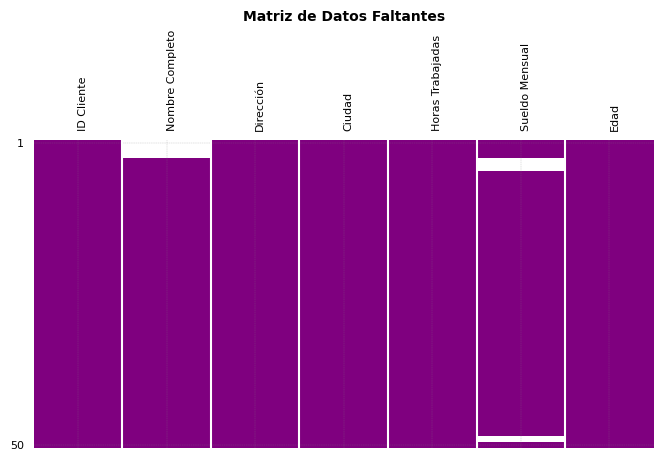

In [284]:
# Visualizar  los  datos faltantes   de  la tabla  clientes  usando la librería MISSINGNO
import missingno as msno
import matplotlib.pyplot as plt

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 4))  # Reduce el tamaño de la gráfica

# Generar la matriz de datos faltantes con colores personalizados
msno.matrix(df, ax=ax, color=(0.5, 0, 0.5))  # Morado para datos completos

# Mejorar la estética
ax.set_title("Matriz de Datos Faltantes", fontsize=10, fontweight='bold')  # Título
ax.tick_params(axis='x', rotation=90, labelsize=8) # Hacer los nombres de las columnas verticales
ax.tick_params(axis='y', labelsize=8)  # Tamaño de los valores del eje Y
ax.grid(color="gray", linestyle="--", linewidth=0.3, alpha=0.5)  # Líneas de fondo en gris claro

# Mostrar la gráfica
plt.show()


In [285]:
#Eliminar filas con valores faltantes
# Importar la librería Pandas para manipulación de datos
import pandas as pd

# Eliminar filas donde la columna "Nombre Completo" tenga valores faltantes (NaN)
df = df.dropna(subset=["Nombre Completo"])

# Mostrar las primeras filas del DataFrame después de la eliminación para verificar los cambios
(df.head())


,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad
3,1003,Camila Torres Ramírez,Avenida 30 #10-20,Barranquilla,144,NaN,56
4,1004,Camila Torres Sánchez,Calle 80 #30-25,Cartagena,143,NaN,36
5,1005,Alejandro Martínez Martínez,Carrera 12 #40-10,Manizales,99,"3,130,396",39
6,1006,Andrés Sánchez Castro,Calle 80 #30-25,Barranquilla,199,"4,292,531",31
7,1007,Andrés Gómez López,Avenida 15 #5-10,Manizales,102,"1,111,416",49


In [287]:
# Reemplazar espacios vacíos con el promedio en la columna "Sueldo Mensual"

# Importar librerías necesarias
import pandas as pd
import numpy as np

# Configurar pandas para mostrar números con separadores de miles y sin decimales
pd.options.display.float_format = '{:,.0f}'.format

# Reemplazar espacios en blanco con NaN en la columna "Sueldo Mensual"
df["Sueldo Mensual"] = df["Sueldo Mensual"].replace(r'^\s*$', np.nan, regex=True)

# Convertir la columna "Sueldo Mensual" a tipo numérico, forzando errores a NaN
df["Sueldo Mensual"] = pd.to_numeric(df["Sueldo Mensual"], errors='coerce')

# Calcular el promedio de "Sueldo Mensual" ignorando valores NaN
promedio_sueldo = df["Sueldo Mensual"].mean()

# Reemplazar los valores NaN con el promedio calculado
df["Sueldo Mensual"].fillna(promedio_sueldo, inplace=True)

# Convertir la columna a tipo entero para eliminar decimales
df["Sueldo Mensual"] = df["Sueldo Mensual"].astype(int)

# Importar la función display para visualizar los datos en formato de tabla (opcional en entornos Jupyter)
from IPython.display import display

# Mostrar únicamente las filas con índices 3, 4 y 48 (asegurar que estos índices existen en el DataFrame)
(df.loc[[3, 4, 48]])


<ipython-input-287-3a480ca7be93>:20: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad
3,1003,Camila Torres Ramírez,Avenida 30 #10-20,Barranquilla,144,3129091,56
4,1004,Camila Torres Sánchez,Calle 80 #30-25,Cartagena,143,3129091,36
48,1048,Andrés Rodríguez López,Avenida 15 #5-10,Ibagué,194,3129091,38


In [288]:
#Manejo de datos duplicados
# Importar librerías
import pandas as pd
import numpy as np


In [289]:
# Identificar duplicados en la columna 'Nombre Completo'

# Mostrar mensaje indicando que se están buscando filas duplicadas
print("\nFilas duplicadas en 'Nombre Completo':")

# Filtrar las filas donde "Nombre Completo" esté duplicado en el DataFrame
# - `subset=["Nombre Completo"]` indica que la búsqueda de duplicados se basa solo en esa columna.
# - `keep=False` marca todas las ocurrencias de un duplicado, en lugar de dejar solo la primera.
duplicados = df[df.duplicated(subset=["Nombre Completo"], keep=False)]

# Mostrar el DataFrame con los duplicados encontrados
duplicados


Filas duplicadas en 'Nombre Completo':


,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad
9,1009,Luisa Castro Gómez,Carrera 12 #40-10,Cali,179,2398154,62
10,1010,Luisa Castro Gómez,Calle 33 #12-50,Cali,134,3227537,42
19,1019,Camila Ramírez Pérez,Calle 50 #18-40,Manizales,113,1508364,19
20,1020,Camila Ramírez Pérez,Avenida 30 #10-20,Barranquilla,138,1387008,39
21,1021,Luisa Castro Gómez,Carrera 7 #15-30,Cali,113,1818554,29
29,1029,Paula Pérez García,Carrera 12 #40-10,Manizales,122,4187869,25
30,1030,Paula Pérez García,Calle 45 #23-10,Cartagena,125,4908671,43
39,1039,Luisa García Pérez,Calle 80 #30-25,Cali,197,4152680,19
40,1040,Luisa García Pérez,Carrera 9 #22-15,Pereira,130,2985573,28


In [298]:
#Eliminar duplicados (manteniendo solo la primera aparición)
df.drop_duplicates(subset=["Nombre Completo"], keep="first", inplace=True)


In [301]:
#Mostrar la tabla sin duplicados
print("\n Tabla sin duplicados en 'Nombre Completo':")
df


 Tabla sin duplicados en 'Nombre Completo':


,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad
3,1003,Camila Torres Ramírez,Avenida 30 #10-20,Barranquilla,144,3129091,56
4,1004,Camila Torres Sánchez,Calle 80 #30-25,Cartagena,143,3129091,36
5,1005,Alejandro Martínez Martínez,Carrera 12 #40-10,Manizales,99,3130396,39
6,1006,Andrés Sánchez Castro,Calle 80 #30-25,Barranquilla,199,4292531,31
7,1007,Andrés Gómez López,Avenida 15 #5-10,Manizales,102,1111416,49
8,1008,Fernando Gómez Pérez,Calle 45 #23-10,Bogotá,193,3279014,57
9,1009,Luisa Castro Gómez,Carrera 12 #40-10,Cali,179,2398154,62
11,1011,Alejandro García Ramírez,Avenida 30 #10-20,Medellín,127,3969518,45
12,1012,Andrés Castro Martínez,Carrera 12 #40-10,Pereira,122,3620307,58
13,1013,Andrés Castro Torres,Calle 45 #23-10,Pereira,126,1593284,40


In [302]:
# Identificar duplicados en la columna 'Nombre Completo'

# Mostrar mensaje indicando que se están buscando filas duplicadas
print("\nFilas duplicadas en 'Nombre Completo':")

# Filtrar las filas donde "Nombre Completo" esté duplicado en el DataFrame
# - `subset=["Nombre Completo"]` indica que la búsqueda de duplicados se basa solo en esa columna.
# - `keep=False` marca todas las ocurrencias de un duplicado, en lugar de dejar solo la primera.
duplicados = df[df.duplicated(subset=["Nombre Completo"], keep=False)]

# Mostrar el DataFrame con los duplicados encontrados
duplicados


Filas duplicadas en 'Nombre Completo':


,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad


**🔢 Transformaciones númericas**

In [305]:
#Transformaciones númericas
#Visualizar los primeros registros de Sueldo Mensual
df["Sueldo Mensual"].head(5)


,Sueldo Mensual
3,3129091
4,3129091
5,3130396
6,4292531
7,1111416


In [178]:
(df["Sueldo Mensual"].describe())


,Sueldo Mensual
count,47
mean,"3,129,091"
std,"1,117,923"
min,"1,111,416"
25%,"2,009,933"
50%,"3,246,201"
75%,"4,170,274"
max,"4,981,392"


In [311]:
#Convertir a pesos colombianos el sueldo mensual
# Importar la librería pandas para manejar dataframes
import pandas as pd
import locale  # Importar biblioteca estándar de Python utilizada para manejar configuraciones regionales

# Configurar el formato de moneda a pesos colombianos
locale.setlocale(locale.LC_ALL, '') # se establece la configuración regional del sistema operativo de forma automática.

# Convertir la columna "Sueldo Mensual" a formato moneda sin decimales
df["Sueldo Mensual COP"] = df["Sueldo Mensual"].apply(lambda x: locale.currency(int(x), grouping=True))

# Mostrar las primeras 5 filas de la nueva columna con el formato aplicado
(df[["Sueldo Mensual COP"]].head(5))


,Sueldo Mensual COP
0,"$1,508,364.00"
1,"$4,152,680.00"
2,"$4,527,736.00"
3,"$3,695,137.00"
4,"$1,637,480.00"


In [307]:
#Ordenar DataFrame por edad
import pandas as pd
# Ordenar el DataFrame por la columna "Edad" de menor a mayor
df = df.sort_values(by="Edad", ascending=True).reset_index(drop=True)

# Mostrar los primeros 5 registros ordenados
(df.head(5))

,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad,Sueldo Mensual COP
0,1019,Camila Ramírez Pérez,Calle 50 #18-40,Manizales,113,1508364,19,"$1,508,364.00"
1,1039,Luisa García Pérez,Calle 80 #30-25,Cali,197,4152680,19,"$4,152,680.00"
2,1046,Sofía López Rodríguez,Calle 50 #18-40,Barranquilla,87,4527736,20,"$4,527,736.00"
3,1028,Sofía López Martínez,Carrera 7 #15-30,Cartagena,149,3695137,21,"$3,695,137.00"
4,1041,Camila Castro Pérez,Avenida 15 #5-10,Manizales,120,1637480,22,"$1,637,480.00"


In [314]:
# Crear una nueva columna "Jornadas Laborales" dividiendo "Horas Trabajadas" entre 8
# Se asume que una jornada laboral estándar es de 8 horas.
df["Jornadas Laborales"] = df["Horas Trabajadas"] / 8

# Mostrar los primeros 5 registros con la nueva columna
# Se seleccionan solo las columnas "Horas Trabajadas" y "Jornadas Laborales" para visualizar los cambios.
(df[["Horas Trabajadas", "Jornadas Laborales"]].head(5))


,Horas Trabajadas,Jornadas Laborales
0,113,14
1,197,25
2,87,11
3,149,19
4,120,15


In [315]:
#Número total de columnas
num_columnas = df.shape[1]
print(f"El DataFrame tiene {num_columnas} columnas.")

#Número total de registros
num_registros = df.shape[0]
print(f"El DataFrame tiene {num_registros} registros.")


El DataFrame tiene 9 columnas.
El DataFrame tiene 42 registros.


**🎮 Ejemplos de las funciones**

In [316]:
#MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Asegurar que la columna "Horas Trabajadas" es numérica
df['Horas Trabajadas'] = pd.to_numeric(df['Horas Trabajadas'], errors='coerce')

# Eliminar valores NaN (si los hay)
df = df.dropna(subset=['Horas Trabajadas'])

# Escalar los datos al rango [0,1]
scaler = MinMaxScaler()
df[['Horas Escaladas']] = scaler.fit_transform(df[['Horas Trabajadas']])

# Mostrar los primeros registros para verificar
(df.head(5))


,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad,Sueldo Mensual COP,Jornadas Laborales,Horas Escaladas
0,1019,Camila Ramírez Pérez,Calle 50 #18-40,Manizales,113,1508364,19,"$1,508,364.00",14,0
1,1039,Luisa García Pérez,Calle 80 #30-25,Cali,197,4152680,19,"$4,152,680.00",25,1
2,1046,Sofía López Rodríguez,Calle 50 #18-40,Barranquilla,87,4527736,20,"$4,527,736.00",11,0
3,1028,Sofía López Martínez,Carrera 7 #15-30,Cartagena,149,3695137,21,"$3,695,137.00",19,1
4,1041,Camila Castro Pérez,Avenida 15 #5-10,Manizales,120,1637480,22,"$1,637,480.00",15,0


In [317]:
#StandardScaler()
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Aplicar StandardScaler a la columna "Sueldo Mensual"
df['Sueldo Escalado'] = scaler.fit_transform(df[['Sueldo Mensual']])

# Mostrar los primeros registros para verificar
(df.head(5))


,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad,Sueldo Mensual COP,Jornadas Laborales,Horas Escaladas,Sueldo Escalado
0,1019,Camila Ramírez Pérez,Calle 50 #18-40,Manizales,113,1508364,19,"$1,508,364.00",14,0,-2
1,1039,Luisa García Pérez,Calle 80 #30-25,Cali,197,4152680,19,"$4,152,680.00",25,1,1
2,1046,Sofía López Rodríguez,Calle 50 #18-40,Barranquilla,87,4527736,20,"$4,527,736.00",11,0,1
3,1028,Sofía López Martínez,Carrera 7 #15-30,Cartagena,149,3695137,21,"$3,695,137.00",19,1,0
4,1041,Camila Castro Pérez,Avenida 15 #5-10,Manizales,120,1637480,22,"$1,637,480.00",15,0,-1


In [318]:
# Calcular el mínimo
min_horas = df["Sueldo Mensual"].min()

# Calcular el máximo
max_horas = df["Sueldo Mensual"].max()

# Calcular el rango (máximo - mínimo)
rango_horas = max_horas - min_horas

# Mostrar resultados
print(f"Mínimo: {min_horas}")
print(f"Máximo: {max_horas}")
print(f"Rango: {rango_horas}")

Mínimo: 1111416
Máximo: 4981392
Rango: 3869976


In [320]:
#apply()
import pandas as pd

# Aplicar una función para calcular el impuesto (10% del sueldo)
df['Impuesto'] = df['Sueldo Mensual'].apply(lambda x: x * 0.10)

# Mostrar resultados
(df.head(5))

,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad,Sueldo Mensual COP,Jornadas Laborales,Horas Escaladas,Sueldo Escalado,Impuesto
0,1019,Camila Ramírez Pérez,Calle 50 #18-40,Manizales,113,1508364,19,"$1,508,364.00",14,0,-2,"150,836"
1,1039,Luisa García Pérez,Calle 80 #30-25,Cali,197,4152680,19,"$4,152,680.00",25,1,1,"415,268"
2,1046,Sofía López Rodríguez,Calle 50 #18-40,Barranquilla,87,4527736,20,"$4,527,736.00",11,0,1,"452,774"
3,1028,Sofía López Martínez,Carrera 7 #15-30,Cartagena,149,3695137,21,"$3,695,137.00",19,1,0,"369,514"
4,1041,Camila Castro Pérez,Avenida 15 #5-10,Manizales,120,1637480,22,"$1,637,480.00",15,0,-1,"163,748"


**🎲 Outliers**

In [324]:
#Identificar los outliers
import pandas as pd  # Importar la librería pandas para manipular el DataFrame

# Calcular el primer cuartil (Q1), que es el percentil 25
Q1 = df['Sueldo Mensual'].quantile(0.25)

# Calcular el tercer cuartil (Q3), que es el percentil 75
Q3 = df['Sueldo Mensual'].quantile(0.75)

# Calcular el rango intercuartílico (IQR), que mide la dispersión de los datos
IQR = Q3 - Q1

# Definir el límite inferior para detectar valores atípicos (outliers)
lower_bound = Q1 - 1.5 * IQR

# Definir el límite superior para detectar valores atípicos (outliers)
upper_bound = Q3 + 1.5 * IQR

# Crear una nueva columna 'Outlier' que marcará con True los valores que sean outliers y con False los valores normales
df['Outlier'] = (df['Sueldo Mensual'] < lower_bound) | (df['Sueldo Mensual'] > upper_bound)

# Mostrar las primeras 5 filas del DataFrame con la nueva columna de outliers
df.head(5)

,ID Cliente,Nombre Completo,Dirección,Ciudad,Horas Trabajadas,Sueldo Mensual,Edad,Sueldo Mensual COP,Jornadas Laborales,Horas Escaladas,Sueldo Escalado,Impuesto,Outlier
0,1019,Camila Ramírez Pérez,Calle 50 #18-40,Manizales,113,1508364,19,"$1,508,364.00",14,0,-2,"150,836",False
1,1039,Luisa García Pérez,Calle 80 #30-25,Cali,197,4152680,19,"$4,152,680.00",25,1,1,"415,268",False
2,1046,Sofía López Rodríguez,Calle 50 #18-40,Barranquilla,87,4527736,20,"$4,527,736.00",11,0,1,"452,774",False
3,1028,Sofía López Martínez,Carrera 7 #15-30,Cartagena,149,3695137,21,"$3,695,137.00",19,1,0,"369,514",False
4,1041,Camila Castro Pérez,Avenida 15 #5-10,Manizales,120,1637480,22,"$1,637,480.00",15,0,-1,"163,748",False


In [328]:
#Diagrama de caja
import pandas as pd
import plotly.graph_objects as go

# Calcular cuartiles e IQR
Q1 = df['Sueldo Mensual'].quantile(0.25)  # Primer cuartil (25%)
Q2 = df['Sueldo Mensual'].median()        # Mediana (50%)
Q3 = df['Sueldo Mensual'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear el boxplot interactivo
fig = go.Figure()
fig.add_trace(go.Box(y=df['Sueldo Mensual'], name="Sueldo Mensual", boxmean=True, marker=dict(color='purple'), fillcolor='rgba(128,0,128,0.3)'))

# Agregar líneas de cuartiles y límites de outliers
fig.add_trace(go.Scatter(y=[Q1, Q1], x=[0, 0], mode='lines', name='Q1 (25%)', line=dict(color='gray', dash='dash')))
fig.add_trace(go.Scatter(y=[Q2, Q2], x=[0, 0], mode='lines', name='Mediana (50%)', line=dict(color='purple', dash='dash')))
fig.add_trace(go.Scatter(y=[Q3, Q3], x=[0, 0], mode='lines', name='Q3 (75%)', line=dict(color='gray', dash='dash')))
fig.add_trace(go.Scatter(y=[lower_bound, lower_bound], x=[0, 0], mode='lines', name='Límite Inferior', line=dict(color='purple', dash='dot')))
fig.add_trace(go.Scatter(y=[upper_bound, upper_bound], x=[0, 0], mode='lines', name='Límite Superior', line=dict(color='purple', dash='dot')))

# Ajustar tamaño del gráfico
fig.update_layout(
    title_text="Boxplot Interactivo de Sueldo Mensual",
    title_x=0.5,
    height=600,  # Aumentar altura para mejor legibilidad
    width=900,   # Ajustar ancho para evitar etiquetas juntas
    yaxis_title="Sueldo Mensual",
    xaxis_title="Sueldo Mensual",
    showlegend=True,
    plot_bgcolor='rgb(240,240,240)'  # Fondo gris claro para mayor contraste
)

fig.show()